In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

2024-11-17 00:32:46.675186: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 00:32:46.678580: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 00:32:46.689091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731799966.710190  276112 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731799966.715508  276112 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 00:32:46.734333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [4]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories=[]
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples], 
        train_data[(i+1)*num_val_samples:]
    ], 
    axis=0)
    partial_train_targets = np.concatenate([
    train_targets[:i * num_val_samples], 
    train_targets[(i + 1) * num_val_samples:]
    ],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0, validation_data = (val_data, val_targets))
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [26]:
all_mae_histories

[[18.860828399658203,
  15.480378150939941,
  11.527122497558594,
  7.539851188659668,
  4.9335784912109375,
  3.8618645668029785,
  3.2586796283721924,
  3.073967456817627,
  2.8667116165161133,
  2.7547972202301025,
  2.7378835678100586,
  2.6065359115600586,
  2.5557138919830322,
  2.5162477493286133,
  2.430386543273926,
  2.3818113803863525,
  2.3932225704193115,
  2.3139076232910156,
  2.2821643352508545,
  2.319626569747925,
  2.278000831604004,
  2.1635639667510986,
  2.2230019569396973,
  2.323662757873535,
  2.2418878078460693,
  2.214916467666626,
  2.119758129119873,
  2.068605661392212,
  2.1156885623931885,
  2.0468685626983643,
  2.0709941387176514,
  2.22493052482605,
  2.136929750442505,
  2.0630202293395996,
  1.9998775720596313,
  2.112001419067383,
  2.2004356384277344,
  2.00713849067688,
  1.9943116903305054,
  2.0294907093048096,
  1.983142614364624,
  1.9812066555023193,
  2.086081027984619,
  1.9716778993606567,
  2.0568408966064453,
  1.9728524684906006,
  1.9

### all_mae_histories = (k, num_epochs). For every epoch - mae on each epoch

In [21]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [22]:
average_mae_history

[np.float64(19.18401527404785),
 np.float64(15.73981785774231),
 np.float64(11.729275226593018),
 np.float64(7.926615118980408),
 np.float64(5.835280418395996),
 np.float64(4.807443976402283),
 np.float64(4.168210506439209),
 np.float64(3.8034037947654724),
 np.float64(3.5309743881225586),
 np.float64(3.320513129234314),
 np.float64(3.2167940735816956),
 np.float64(3.147073745727539),
 np.float64(3.0188605785369873),
 np.float64(2.954489231109619),
 np.float64(2.8921011686325073),
 np.float64(2.828548312187195),
 np.float64(2.814717173576355),
 np.float64(2.7658398747444153),
 np.float64(2.716165840625763),
 np.float64(2.6947134733200073),
 np.float64(2.680375635623932),
 np.float64(2.605861485004425),
 np.float64(2.640318989753723),
 np.float64(2.6283605694770813),
 np.float64(2.6212602853775024),
 np.float64(2.5852659940719604),
 np.float64(2.55901300907135),
 np.float64(2.542919397354126),
 np.float64(2.5502530336380005),
 np.float64(2.4930232167243958),
 np.float64(2.50869637727737

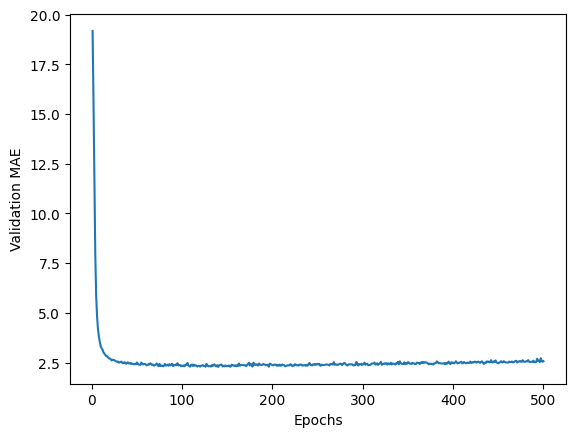

In [32]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

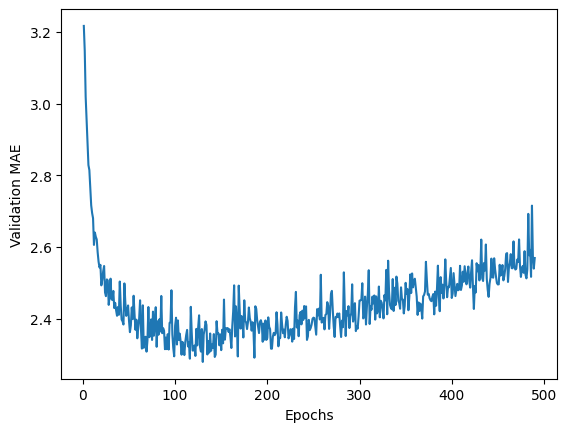

In [33]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [35]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4347 - mae: 2.2763


In [36]:
test_mae_score

2.510895013809204

In [37]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([8.80164], dtype=float32)

In [43]:
test_targets[0]

np.float64(7.2)